In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [2]:
df = pd.read_csv("House_Rent_Dataset.csv")
df.head

<bound method NDFrame.head of        Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/F

## Step 1: Understand the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [4]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(4746, 12)

In [7]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


C:\Users\moh_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rent'>

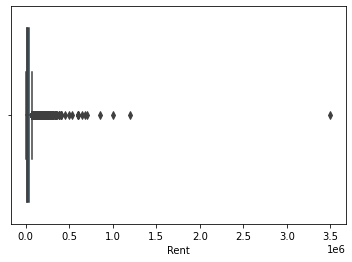

In [8]:
sns.boxplot(df['Rent'])

In [9]:
df["Rent"].sort_values(ascending = False)[:5]

1837    3500000
1001    1200000
827     1000000
1329     850000
1459     700000
Name: Rent, dtype: int64

In [10]:
print(np.where(df['Rent']>1200000))

(array([1837], dtype=int64),)


In [11]:
df.drop([1837], axis=0, inplace=True)

C:\Users\moh_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BHK'>

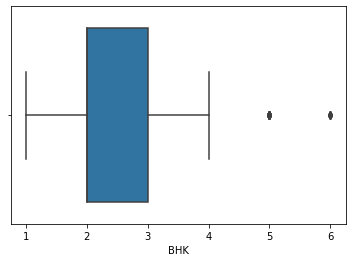

In [12]:
sns.boxplot(df['BHK'])

In [13]:
df["BHK"].sort_values(ascending = False)[:5]

4518    6
83      6
4696    6
4350    6
4648    6
Name: BHK, dtype: int64

In [14]:
print(np.where(df['BHK']>5))

(array([  83, 3319, 3583, 4349, 4478, 4517, 4647, 4695], dtype=int64),)


C:\Users\moh_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Size'>

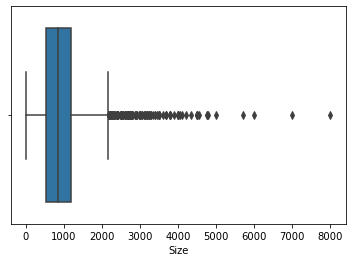

In [15]:
sns.boxplot(df['Size'])

In [16]:
df["Size"].sort_values(ascending = False)[:5]

4185    8000
4457    7000
3622    6000
2048    5700
1001    5000
Name: Size, dtype: int64

In [17]:
print(np.where(df['Size']>6000))

(array([4184, 4456], dtype=int64),)


In [18]:
df.drop([4184, 4456], axis=0, inplace=True)

C:\Users\moh_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bathroom'>

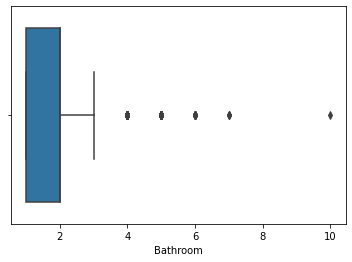

In [19]:
sns.boxplot(df['Bathroom'])

In [20]:
df["Bathroom"].sort_values(ascending = False)[:5]

4185    10
4350     7
4518     7
2846     7
4457     6
Name: Bathroom, dtype: int64

In [21]:
print(np.where(df['Bathroom']>6))

(array([2845, 4183, 4348, 4515], dtype=int64),)


## Observation:
    1- The variables are separated in two groups Quantative (Rent - Size - BHK (number of bedrooms) - Bathrooms) and Categorical (Area Type -  Area Locality -  City - Floor - Furnishing Status - Tenant Preferred - Point of Contact), 
    and the data types are integers and Objects.
    2- The data doesn't include any missing values (null) and no dublicated values as well.
    3- the mean, std, max and min values are also explanatory for the description of our variables.
    4- There're many outliers in our dataset, and I have checked and removed the necessary ones.

## Step 2: 
#### Visualizing the data and invistigating the correlation between our variables:

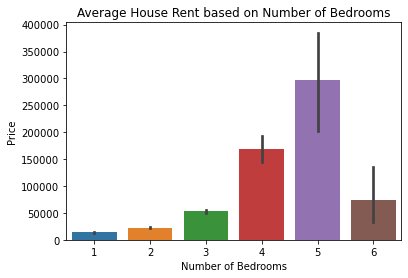

In [23]:
sns.barplot(data=df,
            x='BHK', 
            y='Rent')

plt.title("Average House Rent based on Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.show()

Text(0, 0.5, 'Rent')

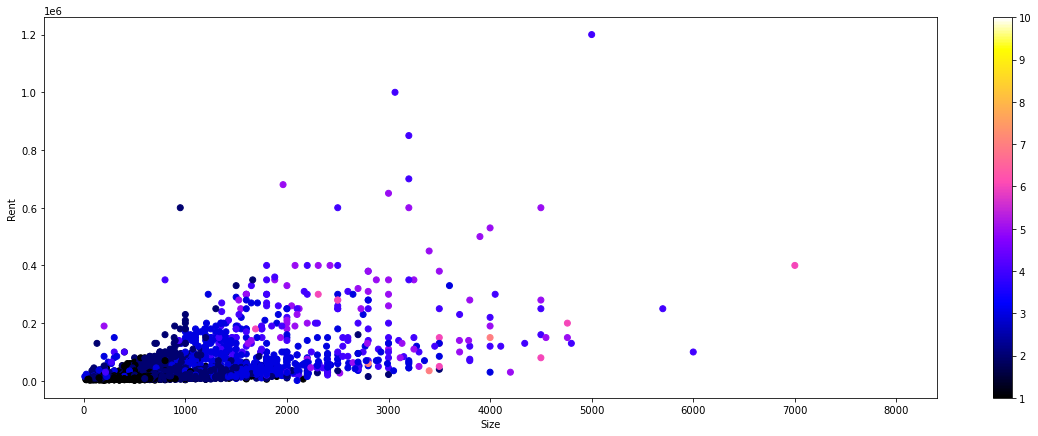

In [24]:
plt.figure(figsize=(20,7))
plt.scatter(data = df, x = 'Size', y = 'Rent', c = 'Bathroom', cmap = 'gnuplot2')
plt.colorbar()
plt.xlabel('Size')
plt.ylabel('Rent')

Text(0, 0.5, 'Rent')

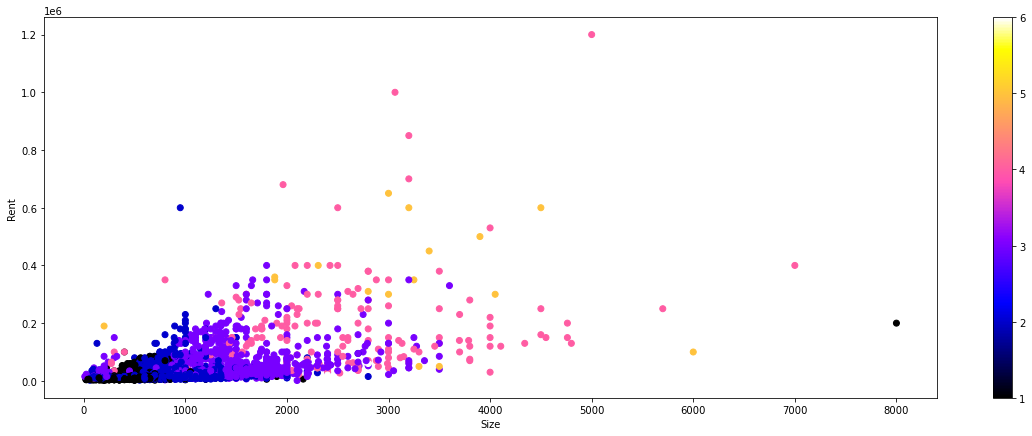

In [25]:
plt.figure(figsize=(20,7))
plt.scatter(data = df, x = 'Size', y = 'Rent', c = 'BHK', cmap = 'gnuplot2')
plt.colorbar()
plt.xlabel('Size')
plt.ylabel('Rent')

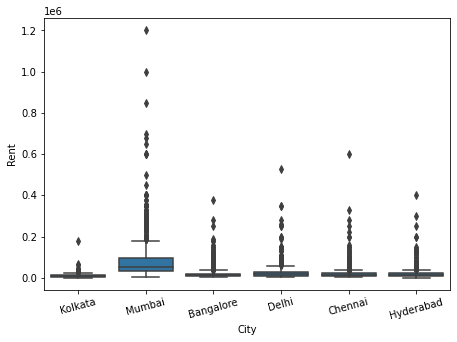

In [26]:
plt.figure(figsize = [16, 5])
base_color = sns.color_palette()[0]
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='City', y='Rent', color=base_color)
plt.xticks(rotation=15);

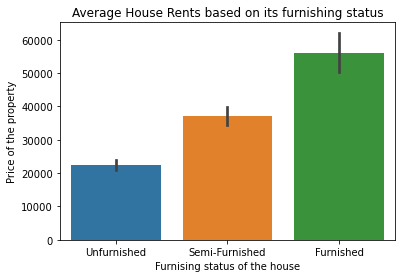

In [27]:
sns.barplot(data=df,
            x='Furnishing Status', 
            y='Rent')

plt.title("Average House Rents based on its furnishing status")
plt.xlabel("Furnising status of the house")
plt.ylabel("Price of the property")
plt.show()

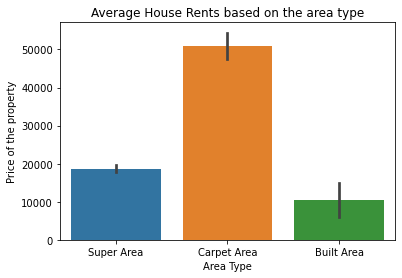

In [28]:
sns.barplot(data=df,
            x='Area Type', 
            y='Rent')

plt.title("Average House Rents based on the area type")
plt.xlabel("Area Type")
plt.ylabel("Price of the property")
plt.show()

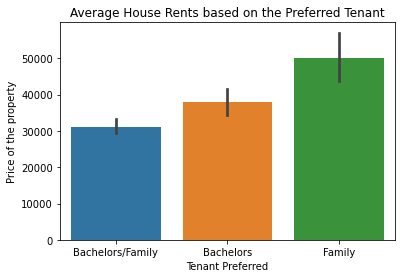

In [29]:
sns.barplot(data=df,
            x='Tenant Preferred', 
            y='Rent')

plt.title("Average House Rents based on the Preferred Tenant")
plt.xlabel("Tenant Preferred")
plt.ylabel("Price of the property")
plt.show()

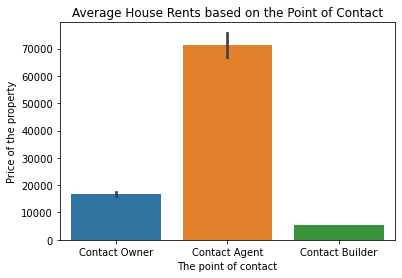

In [30]:
sns.barplot(data=df,
            x='Point of Contact', 
            y='Rent')

plt.title("Average House Rents based on the Point of Contact")
plt.xlabel("The point of contact")
plt.ylabel("Price of the property")
plt.show()

Text(0, 0.5, 'Property price')

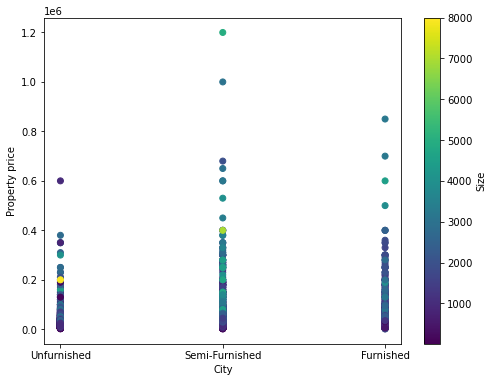

In [31]:
plt.figure(figsize = [8,6])
plt.scatter(data = df, x = 'Furnishing Status', y = 'Rent',
                c = 'Size')
plt.colorbar(label = 'Size')

plt.xlabel('City')
plt.ylabel('Property price')

Text(0, 0.5, 'Property price')

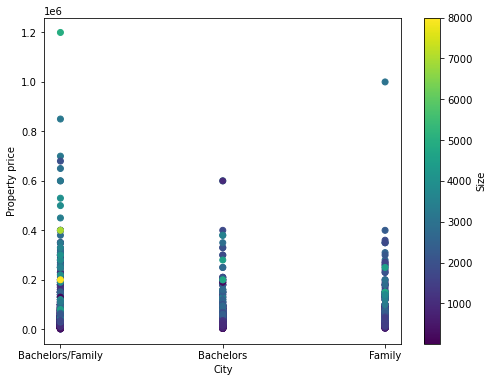

In [32]:
plt.figure(figsize = [8,6])
plt.scatter(data = df, x = 'Tenant Preferred', y = 'Rent',
                c = 'Size')
plt.colorbar(label = 'Size')

plt.xlabel('City')
plt.ylabel('Property price')

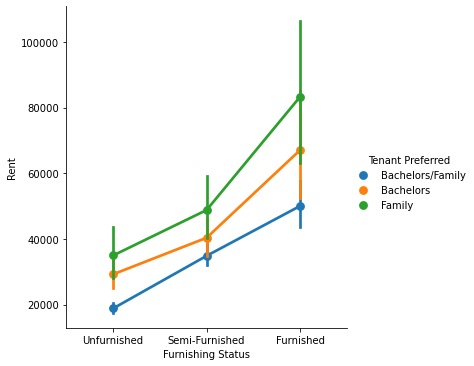

In [33]:
sns.catplot(x="Furnishing Status", y="Rent", hue="Tenant Preferred", kind="point", data=df)

## Observations: 
    1- The correlation coeffecient is a moderate positive between some of the variables and there's no correlation between most of the variables and our main response variable (the Rent or the property price).
    2- This suggests that predicting rent could be best treated as a simple linear regression problem, with square footage, Furnishing status, Tennant preferred as the only valid predictors
    3- We don't have multicoliniaity in our data set and the main categorial variables are not co-related to one another.

## Step 3: 
#### Supervised machhine learning using simple and multiple linear regression models:

In [35]:
df['intercept'] = 1
lm = sm.OLS(df['Rent'], df[['intercept', 'Size', 'BHK', 'Bathroom']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rent   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     800.8
Date:                Sun, 28 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:54:00   Log-Likelihood:                -57921.
No. Observations:                4743   AIC:                         1.159e+05
Df Residuals:                    4739   BIC:                         1.159e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.839e+04   1970.362    -19.483      0.000   -4.23e+04   -3.45e+04
Size          20.0986      1.748     11.499      0.000      16.672      23.525
BHK         -855.6093   1473.997     -0.580      0.562   -3745.329    2034.110
Bathroom    2.798e+04   1440.704     19.421      0.000    2.52e+04    3.08e+04
==============================================================================
Omnibus:                     6038.642   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1811377.422
Skew:                           6.749   Prob(JB):                         0.00
Kurtosis:                      97.782   Cond. No.                     3.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Observations: 
    1- The correlation coeffecient R is Weak positive and the R square is 0.336.
    2- b0 -3.839.
    3- The numbers of (Size - BHK - Bathrooms) isn't statistically significant in relation to the Property price and the slope isn't close to zero and the null hypothysis.

In [36]:
df[['Semi-Furnished', 'Unfurnished', 'Furnished']] = pd.get_dummies(df['Furnishing Status'])
df[['Bachelors/Family', 'Bachelors', 'Family']] = pd.get_dummies(df['Tenant Preferred'])
df[['Mumbai', 'Chennai', 'Bangalore', 'Hyderabad', 'Delhi', 'Kolkata']] = pd.get_dummies(df['City']) 
df.head

<bound method NDFrame.head of        Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/F

In [37]:
df['intercept'] = 1
lm = sm.OLS(df['Rent'], df[['intercept', 'Mumbai', 'Chennai', 'Delhi', 'Hyderabad', 'Furnished', 'Semi-Furnished', 'Bachelors', 'Family']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rent   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     106.0
Date:                Sun, 28 Aug 2022   Prob (F-statistic):          3.42e-163
Time:                        18:55:03   Log-Likelihood:                -58503.
No. Observations:                4743   AIC:                         1.170e+05
Df Residuals:                    4734   BIC:                         1.171e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept       6.927e+04   2414.397     28.691      0.000    6.45e+04     7.4e+04
Mumbai         -4.234e+04   2358.059    -17.956      0.000    -4.7e+04   -3.77e+04
Chennai        -3.984e+04   2330.038    -17.099      0.000   -4.44e+04   -3.53e+04
Delhi          -4.651e+04   2818.640    -16.499      0.000    -5.2e+04    -4.1e+04
Hyderabad       -4.09e+04   2349.460    -17.406      0.000   -4.55e+04   -3.63e+04
Furnished      -1.479e+04   1790.470     -8.262      0.000   -1.83e+04   -1.13e+04
Semi-Furnished  1.106e+04   2443.653      4.527      0.000    6272.314    1.59e+04
Bachelors      -5086.7872   2154.369     -2.361      0.018   -9310.352    -863.222
Family          7575.6063   3204.741      2.364      0.018    1292.823    1.39e+04
==============================================================================
Omnibus:                     6150.677   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1579215.246
Skew:                           7.072   Prob(JB):                         0.00
Kurtosis:                      91.266   Cond. No.                         6.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
df['intercept'] = 1
lm = sm.OLS(df['Rent'], df[['intercept', 'Furnished', 'Semi-Furnished', 'Bachelors', 'Family']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rent   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     55.73
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           5.37e-46
Time:                        18:55:13   Log-Likelihood:                -58785.
No. Observations:                4743   AIC:                         1.176e+05
Df Residuals:                    4738   BIC:                         1.176e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept       4.312e+04   2285.433     18.868      0.000    3.86e+04    4.76e+04
Furnished      -1.491e+04   1854.141     -8.043      0.000   -1.85e+04   -1.13e+04
Semi-Furnished  1.896e+04   2557.161      7.413      0.000    1.39e+04     2.4e+04
Bachelors      -9238.3233   2272.553     -4.065      0.000   -1.37e+04   -4783.064
Family          8468.5281   3385.742      2.501      0.012    1830.900    1.51e+04
==============================================================================
Omnibus:                     6016.706   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1286841.324
Skew:                           6.856   Prob(JB):                         0.00
Kurtosis:                      82.520   Cond. No.                         6.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Observations: 
    1- The correlation coeffecient R is also weak positive in our categorical variables and the main response variable and the R square is 0.152 and 0.045.
    2- b0 4.312.

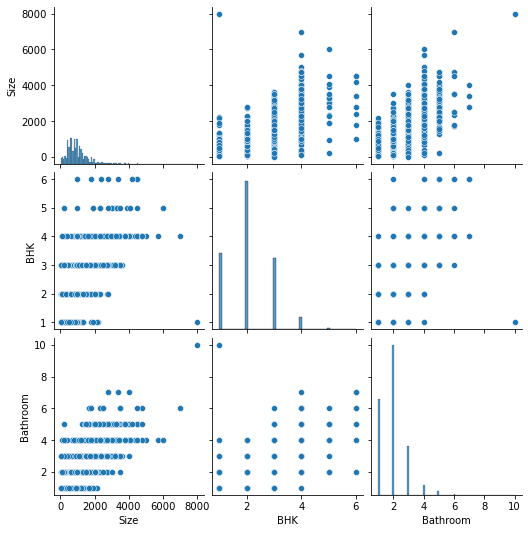

In [39]:
sns.pairplot(df[['Size', 'BHK', 'Bathroom']])

In [40]:
y, x = dmatrices('Rent ~ Size + BHK + Bathroom', df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [41]:
vif

,VIF Factor,features
0,7.763749,Intercept
1,2.454884,Size
2,3.008862,BHK
3,3.247164,Bathroom


## Observations: 
    1- We don't have multicoliniaity in our data set and the variables are not co-related to one another.